# IPAI - Project

# Index

1. Dataset Analysis
2. Dataset Pre-processing

In [1]:
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

#
import sklearn
from sklearn.cluster import DBSCAN
import numpy as np
from scipy.spatial import ConvexHull


In [2]:
# set general params
sns.set_style("whitegrid")

# 1. Dataset Analysis

In [3]:
file_path = '../data/pizza_sales_original.xlsx'
df = pd.read_excel(file_path)

In [5]:
print(df.columns)

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')


In [6]:
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [8]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [9]:
# Check for duplicates
duplicates = Counter(df.duplicated())
duplicates

Counter({False: 48620})

In [10]:
# Check number of uniques in each col against total number of rows
uniques = df.nunique()
print(f"Total: {df.shape[0]} rows")
print(uniques)

Total: 48620 rows
order_details_id     48620
order_id             21350
pizza_id                91
quantity                 4
order_date             358
order_time           16382
unit_price              25
total_price             56
pizza_size               5
pizza_category           4
pizza_ingredients       32
pizza_name              32
dtype: int64


In [11]:
# Check for data types
print(df.dtypes)

order_details_id              int64
order_id                      int64
pizza_id                     object
quantity                      int64
order_date           datetime64[ns]
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
dtype: object


        order_details_id      order_id    pizza_id      quantity  \
count       48620.000000  48620.000000       48620  48620.000000   
unique               NaN           NaN          91           NaN   
top                  NaN           NaN  big_meat_s           NaN   
freq                 NaN           NaN        1811           NaN   
first                NaN           NaN         NaN           NaN   
last                 NaN           NaN         NaN           NaN   
mean        24310.500000  10701.479761         NaN      1.019622   
std         14035.529381   6180.119770         NaN      0.143077   
min             1.000000      1.000000         NaN      1.000000   
25%         12155.750000   5337.000000         NaN      1.000000   
50%         24310.500000  10682.500000         NaN      1.000000   
75%         36465.250000  16100.000000         NaN      1.000000   
max         48620.000000  21350.000000         NaN      4.000000   

                 order_date order_time    unit_

C:\Users\Admin\AppData\Local\Temp\ipykernel_19712\1350110733.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df.describe(include="all"))


array([[<AxesSubplot:title={'center':'order_details_id'}>,
        <AxesSubplot:title={'center':'order_id'}>],
       [<AxesSubplot:title={'center':'quantity'}>,
        <AxesSubplot:title={'center':'order_date'}>],
       [<AxesSubplot:title={'center':'unit_price'}>,
        <AxesSubplot:title={'center':'total_price'}>]], dtype=object)

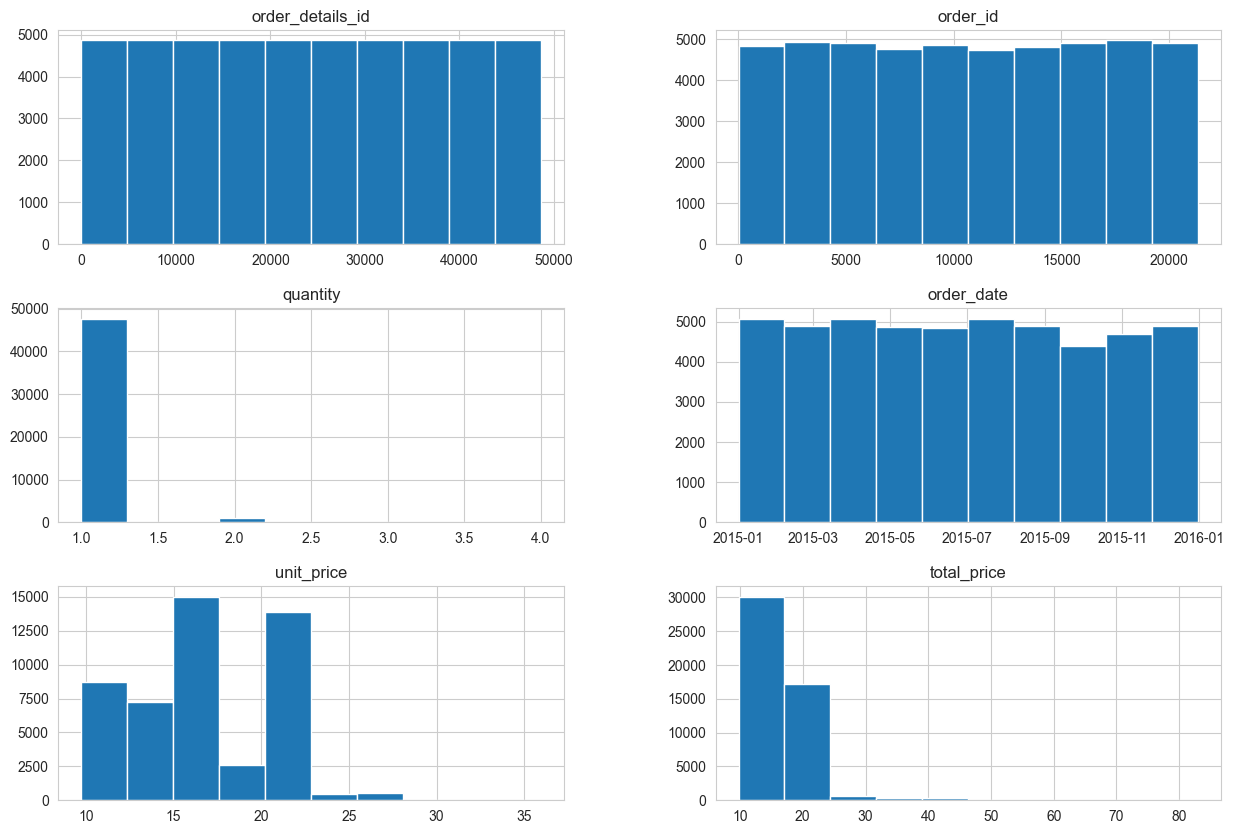

In [12]:
# Statistical summary about each column (might not make sense for all columns)
print(df.describe(include="all"))

# Plot overall histograms with distributions for each column
df.hist(figsize=(15,10))

count    48620.000000
mean        16.494132
std          3.621789
min          9.750000
25%         12.750000
50%         16.500000
75%         20.250000
max         35.950000
Name: unit_price, dtype: float64

NaNs: 0.0




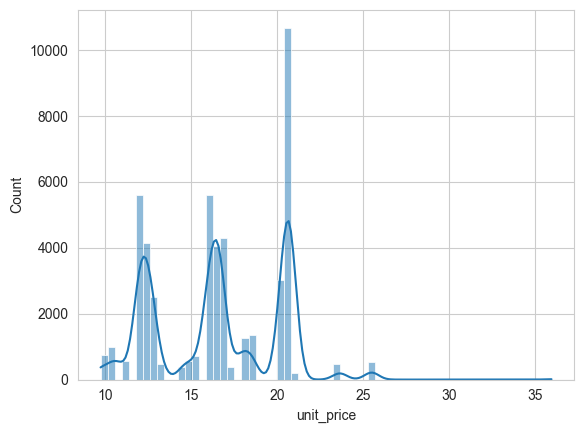

count    48620.000000
mean        16.821474
std          4.437398
min          9.750000
25%         12.750000
50%         16.500000
75%         20.500000
max         83.000000
Name: total_price, dtype: float64

NaNs: 0.0




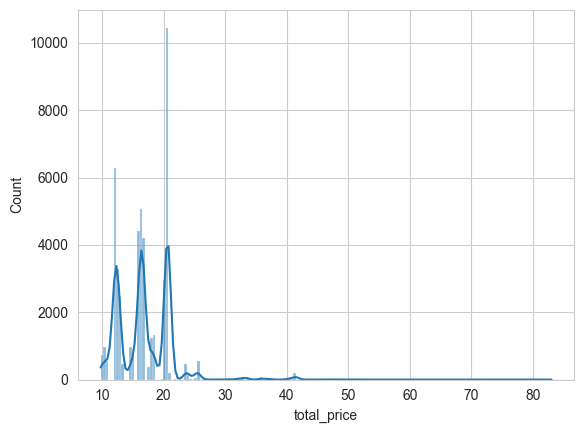

count     48620
unique        5
top           L
freq      18526
Name: pizza_size, dtype: object

NaNs: 0




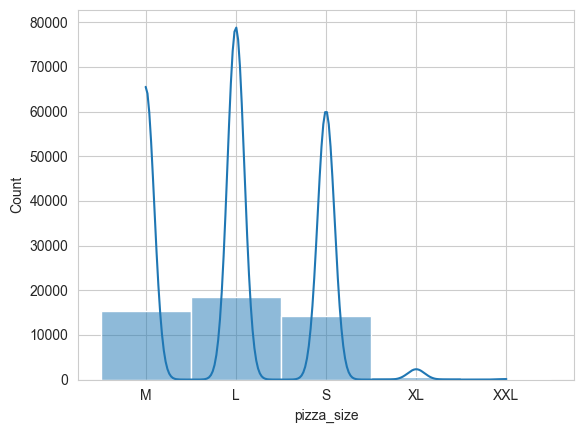

count       48620
unique          4
top       Classic
freq        14579
Name: pizza_category, dtype: object

NaNs: 0




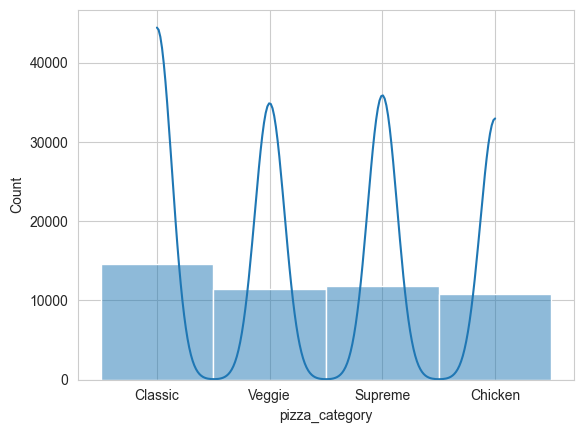

count                                                 48620
unique                                                   32
top       Pepperoni, Mushrooms, Red Onions, Red Peppers,...
freq                                                   2416
Name: pizza_ingredients, dtype: object

NaNs: 0




c:\Users\Admin\.conda\envs\fireloc\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24923 (\N{CJK UNIFIED IDEOGRAPH-615B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


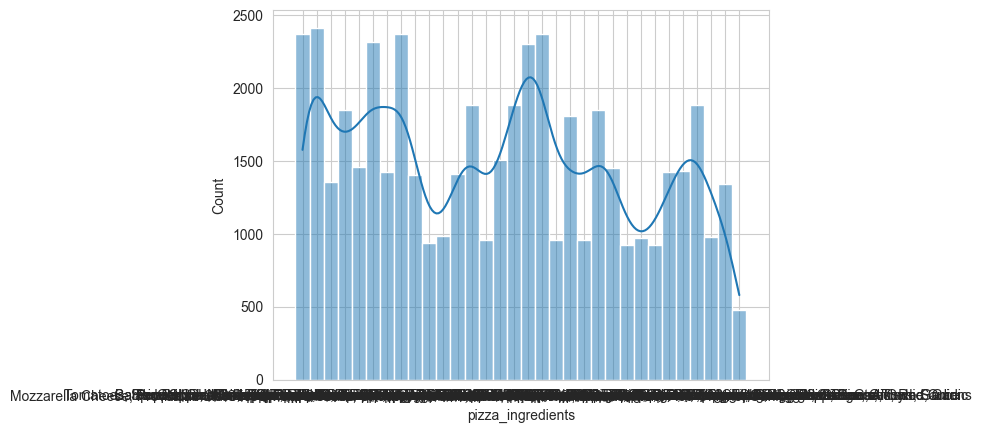

count                        48620
unique                          32
top       The Classic Deluxe Pizza
freq                          2416
Name: pizza_name, dtype: object

NaNs: 0




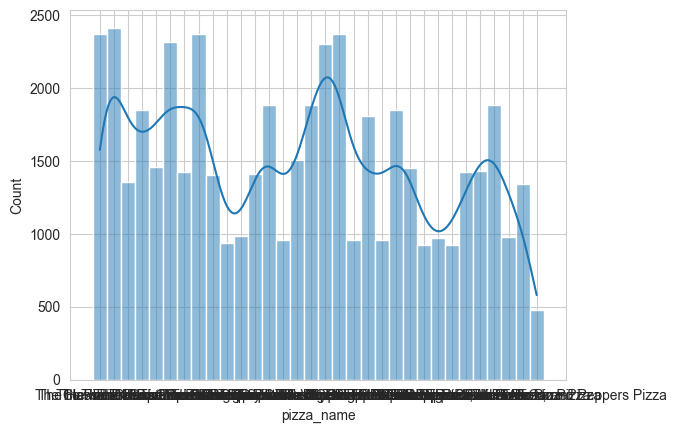

In [13]:
# More plots for each  continuous column
for col in df.columns[3:]:

    if df[col].dtype == "float64" or df[col].dtype == "object" and col != 'order_time':
        desc = df[col].describe()
        print(desc)
        print(f'\nNaNs: {len(df) - desc.loc["count"]}')
        print('\n')

        # KDE is Kernel Density Estimation, a way to estimate the probability density function of a continuous random variable
        sns.histplot(df, x = col, bins='auto', kde=True)
        plt.show()

c:\Users\Admin\.conda\envs\fireloc\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24923 (\N{CJK UNIFIED IDEOGRAPH-615B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


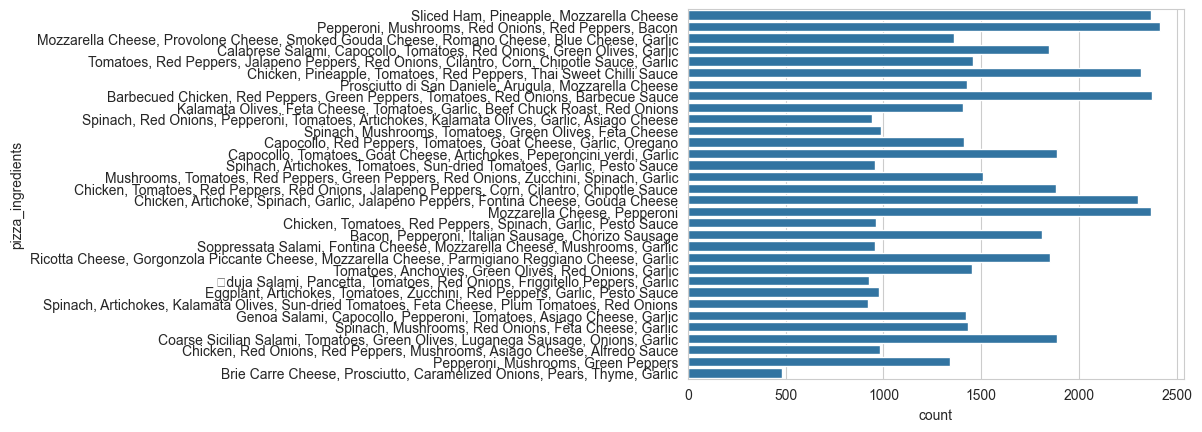

In [14]:
sns.countplot(y='pizza_ingredients', data=df)
plt.show()

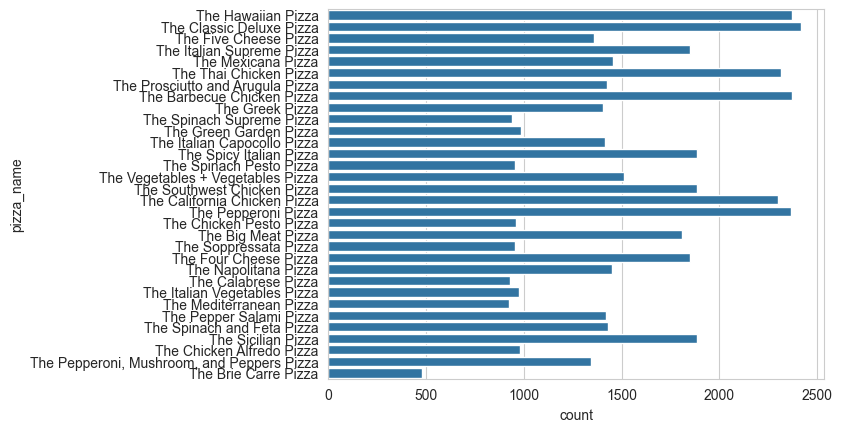

In [15]:
sns.countplot(y=df['pizza_name'])
plt.show()

                  order_details_id  order_id  quantity  unit_price  \
order_details_id          1.000000  0.999990  0.003639   -0.003286   
order_id                  0.999990  1.000000  0.003621   -0.003323   
quantity                  0.003639  0.003621  1.000000    0.007142   
unit_price               -0.003286 -0.003323  0.007142    1.000000   
total_price              -0.000847 -0.000889  0.541926    0.836087   

                  total_price  
order_details_id    -0.000847  
order_id            -0.000889  
quantity             0.541926  
unit_price           0.836087  
total_price          1.000000  


<AxesSubplot:>

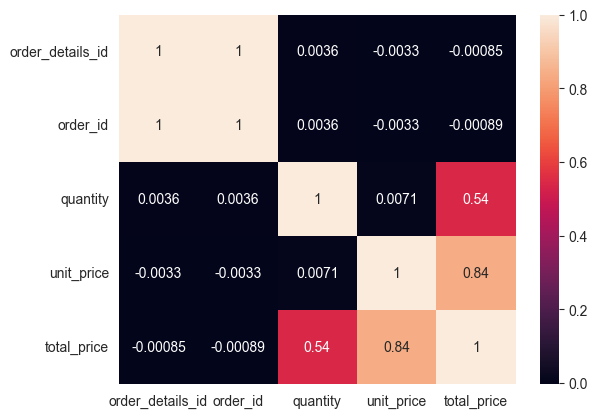

In [16]:
# Check for correlations
# Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

# Plot correlation matrix
sns.heatmap(correlation_matrix, annot=True)


## 1.1 Analysis
These plots are merely for visual representation of each column.

Given the fact that the non-categorical columns represent prices or ID's, a statistical analysis on these columns is not properly fitted.

Nevertheless, it gives an overall perspective about the distribution of the values.

# 2. Dataset Pre-processing
As seen in the analysis before, the dataset is impecable in terms of noisy data: no duplicates and no null values.

Regarding outliers, it is a rather tricky question relative to this dataset. As much of the columns are prices, defining what is an outlier is this context is hard or even not feasible. 

Thus, we decided to not do any outlier removal approach.


In [4]:
df_cleaned = df.copy()

In [6]:
# Extracting time and date from order_time and order_date for easier manipulation and analysis
df_cleaned[ ["order_hour", "order_minute", "order_second"]  ] = pd.DataFrame( df_cleaned["order_time"].apply(lambda x: x.strftime("%H:%M:%S").split(":")).tolist() ).astype(np.int64)
df_cleaned[ ["order_day", "order_month", "order_year"] ] = pd.DataFrame( df_cleaned["order_date"].apply(lambda x: [x.day, x.month, x.year]).tolist() )

# df_cleaned.drop("order_time", axis=1, inplace=True)
# df_cleaned.drop("order_date", axis=1, inplace=True)

# Extra Date Dimension Attributes
# DayNumberOfWeek
# DayNameOfWeek
# WeekendIndicator
df_cleaned[ "DayNumberOfWeek" ] = df["order_date"].apply(lambda x: x.weekday())
df_cleaned[ "DayNameOfWeek" ] = df["order_date"].apply(lambda x: x.strftime("%A"))
df_cleaned[ "WeekendIndicator" ] = df["DayNumberOfWeek"].apply(lambda x: "Yes" if x >= 5 else "No")



In [27]:
df_cleaned.tail(20)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,...,order_hour,order_minute,order_second,order_day,order_month,order_year,DayNumberOfWeek,DayNameOfWeek,WeekendIndicator,sku
48600,48601,21343,pepperoni_l,1,2015-12-31,20:27:23,15.25,15.25,L,Classic,...,20,27,23,31,12,2015,3,Thursday,No,20
48601,48602,21343,spicy_ital_l,2,2015-12-31,20:27:23,20.75,41.50,L,Supreme,...,20,27,23,31,12,2015,3,Thursday,No,26
48602,48603,21344,calabrese_l,1,2015-12-31,20:43:46,20.25,20.25,L,Supreme,...,20,43,46,31,12,2015,3,Thursday,No,3
48603,48604,21344,four_cheese_m,1,2015-12-31,20:43:46,14.75,14.75,M,Veggie,...,20,43,46,31,12,2015,3,Thursday,No,9
48604,48605,21344,pepperoni_m,1,2015-12-31,20:43:46,12.50,12.50,M,Classic,...,20,43,46,31,12,2015,3,Thursday,No,20
48605,48606,21345,classic_dlx_s,1,2015-12-31,20:44:43,12.00,12.00,S,Classic,...,20,44,43,31,12,2015,3,Thursday,No,7
48606,48607,21345,spin_pesto_m,1,2015-12-31,20:44:43,16.50,16.50,M,Veggie,...,20,44,43,31,12,2015,3,Thursday,No,27
48607,48608,21346,big_meat_s,1,2015-12-31,20:51:07,12.00,12.00,S,Classic,...,20,51,7,31,12,2015,3,Thursday,No,1
48608,48609,21346,cali_ckn_m,1,2015-12-31,20:51:07,16.75,16.75,M,Chicken,...,20,51,7,31,12,2015,3,Thursday,No,4
48609,48610,21346,cali_ckn_s,1,2015-12-31,20:51:07,12.75,12.75,S,Chicken,...,20,51,7,31,12,2015,3,Thursday,No,4


In [22]:
# Create an SKU (Stock Keeping Unit) for each pizza
df_cleaned["sku"] = df_cleaned["pizza_name"].astype('category').cat.codes

In [21]:
# Checking for data types
df_cleaned.dtypes

order_details_id              int64
order_id                      int64
pizza_id                     object
quantity                      int64
order_date           datetime64[ns]
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
order_hour                    int64
order_minute                  int64
order_second                  int64
order_day                     int64
order_month                   int64
order_year                    int64
DayNumberOfWeek               int64
DayNameOfWeek                object
WeekendIndicator             object
dtype: object

# 3.

# ETL
TODO:
- REVIEW NATURAL KEYS

In [7]:
import json
import os.path
from datetime import datetime
from typing import Tuple

# -----------------------------------------------------------------------------

class LookupTable:
    """
    A lookup table with correspondences between natural keys and surrogate
    keys concerning a dimension table. Ideally, it should be pinned in
    memory during the ETL process execution, particularly during the loading
    of the fact table.

    The lookup table can be stored in a file so it can be reused in the next
    ETL process execution, allowing incremental loading of data in dimension
    and fact tables.
    """

    def __init__(self, dimension_name: str):

        # Name of the dimension served by the lookup table.
        self.dimension_name = dimension_name

        # Surrogate key for the next new row in the dimension table.
        self.next_surrogate_key = 1

        # Lookup table relating natural keys with surrogate keys. It is
        # actually a dictionary, for faster performance, in which the keys
        # are natural keys and the values are surrogate keys.
        self.lookup_table = {}

        # Name of the JSON file that stores the lookup table for the dimension.
        base_path = "./lookup_tables/"

        if not os.path.exists(base_path):
            os.makedirs(base_path)

        self.lookup_table_file_name = base_path + "lut_" + self.dimension_name + ".json"

    def get_surrogate_key(self, natural_key: str) -> Tuple[int, bool]:
        """
        Returns a tuple with the surrogate key corresponding to the given
        natural key and a boolean indicating if the surrogate key already
        existed in the lookup table (True) or was added to the table (False).
        """
        surrogate_key_already_existed = None
        surrogate_key = self.lookup_table.get(natural_key)

        if surrogate_key is None:
            surrogate_key_already_existed = False
            # surrogate_key = self.next_surrogate_key
            # self.lookup_table[natural_key] = surrogate_key
            # self.next_surrogate_key += 1
        else:
            surrogate_key_already_existed = True

        return (surrogate_key, surrogate_key_already_existed)

    def add_entry(self, natural_key: str, surrogate_key: int):
        """
        Adds an entry to the lookup table.
        """
        self.lookup_table[natural_key] = surrogate_key
        self.next_surrogate_key = max(self.next_surrogate_key, surrogate_key + 1)

    def load(self):
        """
        Loads a lookup table for the dimension from a file.
        """
        if os.path.isfile(self.lookup_table_file_name):
            with open(self.lookup_table_file_name,
                      mode="r", encoding="utf-8") as lookup_table_file:
                self.lookup_table = json.load(lookup_table_file)

            # Update the surrogate key for the
            # next new row in the dimension table.
            self.next_surrogate_key = max(list(self.lookup_table.values())) + 1

    def save(self):
        """
        Saves the lookup table for the dimension to a file.
        """
        with open(self.lookup_table_file_name,
                  mode="w", encoding="utf-8") as lookup_table_file:
            json.dump(self.lookup_table, lookup_table_file)


    def print(self):
        """
        Prints the lookup table.
        """
        print("Lookup Table for Dimension: " + self.dimension_name)
        print("Natural Key  |  Surrogate Key")
        for natural_key, surrogate_key in self.lookup_table.items():
            print( str(natural_key) + "  |  " + str(surrogate_key))
        print("----------------------------")
# -----------------------------------------------------------------------------

class AbstractDimension:
    """
    An abstract class that defines methods to be implemented by all classes
    representing dimension tables.
    """

    def __init__(self, dimension_name: str, db_connection):

        if not db_connection:
            raise ValueError("Database connection not provided.")

        if not dimension_name:
            raise ValueError("Dimension/Table name not provided.")

        # Database connection.
        self.db_connection = db_connection

        # Name of the dimension/table name.
        self.dimension_name = dimension_name

        # Lookup table for this dimension, storing correspondences between
        # natural keys and surrogate keys.
        self.lookup_table = None


    def begin_processing(self):
        """
        Loads the natural and surrogate keys lookup table from a file, if it exists
        """

        if self.lookup_table is None:
            self.lookup_table = LookupTable(self.dimension_name)
            self.lookup_table.load()

    def end_processing(self):
        """
        Saves the natural and surrogate keys lookup table to a file.
        """

        if self.lookup_table is not None:
            self.lookup_table.save()
            self.lookup_table = None

    def process_operational_row(self, operational_row):
        """
        Extracts the relevant data from an operational row, applies
        transformations, obtains a surrogate key, and generates a row for the
        dimension table, which is then saved in TSV format to the dimension
        file. The method should call save_processed_row() at the end.
        """
        # The code for this method is specific to each dimension.



# -----------------------------------------------------------------------------

class OrderDetailsFacts:
    """
    A class for processing order details facts.
    """

    def __init__(self, pizza_lookup_table: LookupTable,
                       date_lookup_table: LookupTable,
                       order_lookup_table: LookupTable, 
                       table_name = "factOrderDetails", 
                       db_connection = None):

        if not db_connection:
            raise ValueError("Database connection not provided.")

        # Database connection.
        self.db_connection = db_connection

        # Name of the fact table.
        self.fact_name = table_name

        # Lookup tables for the dimensions participating in each fact. Each
        # lookup table has correspondences between natural and surrogate keys.
        self.pizza_lookup_table = pizza_lookup_table
        self.date_lookup_table = date_lookup_table
        self.order_lookup_table = order_lookup_table


    def process_operational_row(self, operational_row):
        """
        """

        # Extract natural keys referencing dimensions and measure values.
        pizza_natural_key = operational_row["pizza_name"]
        order_id = operational_row["order_id"]
        date = operational_row["order_date"]
        time = operational_row["order_time"]
        date_natural_key = str(date) + " " + str(time)

        # Get surrogate keys corresponding to the natural keys.
        pizza_surrogate_key, pizza_already_existed = \
            self.pizza_lookup_table.get_surrogate_key(pizza_natural_key)

        date_surrogate_key, date_already_existed = \
            self.date_lookup_table.get_surrogate_key(date_natural_key)

        order_surrogate_key, order_already_existed = \
            self.order_lookup_table.get_surrogate_key(order_id)

        # Check if there is any missing surrogate key
        if pizza_already_existed and date_already_existed and order_already_existed:

            # Get Measures
            quantity = operational_row["quantity"]
            total_price_transaction = operational_row["total_price_transaction"]

            #Insert into fact table 
            self.db_connection.cursor().execute("INSERT INTO %s (PizzaKey, DateKey, OrderKey, Quantity, TotalPriceTransaction) \
                VALUES (%s, %s, %s, %s, %s)" % \
                (self.fact_name, pizza_surrogate_key, date_surrogate_key, order_surrogate_key, quantity, total_price_transaction) )

            self.db_connection.commit()

        else:
            # Should never happen.
            print("--- ERROR ---")
            print("{} {} {}".format(pizza_natural_key, date_natural_key, order_id))
            print("{} {} {}".format(pizza_surrogate_key, date_surrogate_key, order_surrogate_key))
            print( pizza_already_existed, date_already_existed, order_already_existed,"\nSkipped this fact because it has one or more invalid " \
                  "surrogate keys\n")
            print("--- ----- ---")

# -----------------------------------------------------------------------------

class DateDimension(AbstractDimension):
    """
    A class for processing the date and timedimension.
    """

    def __init__(self, db_connection,table_name: str = "dimDate"):
        super().__init__(dimension_name = table_name, db_connection = db_connection)


    def process_operational_row(self, operational_row):

        # Get date natural key
        date = operational_row["order_date"]
        time = operational_row["order_time"]
        date_natural_key = str(date) + " " + str(time)

        # Get surrogate key for the current date.
        date_surrogate_key, date_already_existed = \
            self.lookup_table.get_surrogate_key(date_natural_key)

        # If date is new insert into the dimension table
        if not date_already_existed:

            # Process the date and time
            order_hour, order_minute, order_second = time.strftime("%H:%M:%S").split(":")
            order_hour, order_minute, order_second = int(order_hour), int(order_minute), int(order_second)


            order_day, order_month, order_year = date.day, date.month, date.year

            # Extra attributes
            day_number_of_week = date.weekday()
            day_name_of_week = date.strftime("%A")
            weekend_indicator = "y" if day_number_of_week >= 5 else "n"
            season = "winter" if order_month in [12, 1, 2] else "spring" if order_month in [3, 4, 5] else "summer" if order_month in [6, 7, 8] else "fall"
            
            # Insert into the dimension table
            cursor = self.db_connection.cursor()

            # TODO solve hard coded table name
            cursor.execute("INSERT INTO dimDate (Day, Month, Year, Hour, Minute, Second, Season, DayNumberOfWeek, DayNameOfWeek, WeekendIndicator) \
                VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) RETURNING DateKey", \
                [order_day, order_month, order_year, order_hour, order_minute, order_second, season, day_number_of_week, day_name_of_week, weekend_indicator])

            date_surrogate_key = cursor.fetchone()[0]
            self.db_connection.commit()

            # Update the lookup table
            self.lookup_table.add_entry(date_natural_key, date_surrogate_key)

        return date_surrogate_key

# -----------------------------------------------------------------------------

class PizzaDimension(AbstractDimension):
    """
    PizzaDim
    """

    def __init__(self, db_connection, category_lookup_table: LookupTable, table_name: str = "dimPizza"):
        super().__init__(dimension_name= table_name, db_connection= db_connection)

        if not category_lookup_table:
            raise ValueError("category_lookup_table argument cannot be None")

        self.category_lookup_table = category_lookup_table


    def process_operational_row(self, operational_row):

        # Extract natural key, which in this case corresponds to the pizza name.
        pizza_natural_key = operational_row["pizza_name"]

        # Get surrogate keys corresponding to the natural keys.
        # In this case, we need to know the surrogate key to the Category Dimension
        category_surrogate_key, category_already_existed = \
            self.category_lookup_table.get_surrogate_key( operational_row["pizza_category"])

        # Get Pizza surrogate key
        product_surrogate_key, product_already_existed = \
            self.lookup_table.get_surrogate_key(pizza_natural_key)

     

        # Save the pizza in the dimension table if it does not exist
        if not product_already_existed:

            # Get Pizza infos
            pizza_sku = operational_row["sku"]
            pizza_size = operational_row["pizza_size"]
            pizza_price = operational_row["unit_price"]
            pizza_ingredients = operational_row["pizza_ingredients"]

            # Insert into the table and get the new surrogate key
            # TODO solve hard coded table name
            cursor = self.db_connection.cursor()            

            cursor.execute("INSERT INTO dimPizza (CategoryKey, SKU, PizzaName, Size, UnitPrice, Ingredients, RowEffectiveDate, RowExpirationDate, CurrentRowIndicator) \
                VALUES (%s,%s,%s,%s,%s,%s, %s,%s,%s) RETURNING PizzaKey", [ \
                category_surrogate_key, pizza_sku, pizza_natural_key, pizza_size, pizza_price, pizza_ingredients, datetime.now(), datetime.max, 'y'])
            
            product_surrogate_key = cursor.fetchone()[0]

            self.db_connection.commit()

        # Update the lookup table
        self.lookup_table.add_entry(pizza_natural_key, product_surrogate_key)
# -----------------------------------------------------------------------------

class CategoryDimension(AbstractDimension):

    def __init__(self, db_connection ,table_name: str = "dimCategory"):
        super().__init__(dimension_name= table_name, db_connection=db_connection)

    def process_operational_row(self, operational_row):
        
        # Used as natural key
        category_name = operational_row["pizza_category"]

        # Get the surrogate key, if it exists in the lookup table
        category_surrogate_key, category_already_existed = self.lookup_table.get_surrogate_key(category_name)

        # If category still doesn't exist
        if not category_already_existed:
            
            # Insert into the dimCategory table and get the surrogate key
            cursor = self.db_connection.cursor()

            # TODO SOLVE HARD CODE
            cursor.execute("INSERT INTO dimCategory (Category) VALUES (%s) RETURNING CategoryKey", [category_name])
            category_surrogate_key = cursor.fetchone()[0]

            self.db_connection.commit()

            # Update lookup table
            self.lookup_table.add_entry(category_name, category_surrogate_key)


        return category_surrogate_key

# -----------------------------------------------------------------------------

class OrderDimension(AbstractDimension):
    
        def __init__(self, db_connection, table_name: str = "dimOrder"):
            super().__init__(dimension_name=table_name, db_connection=db_connection)
    
        def process_operational_row(self, operational_row):
    
            # Get natural key, in this case just the order_id
            order_id = operational_row["order_id"]
    
            # Get the surrogate key, if it exists in the lookup table
            order_surrogate_key, order_already_existed = self.lookup_table.get_surrogate_key(order_id)
    
            # If order still doesn't exist
            if not order_already_existed:

                # Get order total price
                order_total_price = operational_row["total_price_order"]
                
                # Insert into the dimOrder table and get the surrogate key
                cursor = self.db_connection.cursor()
                cursor.execute("INSERT INTO dimOrder (TotalPrice) VALUES (%s) RETURNING OrderKey",\
                    [order_total_price])
                
                order_surrogate_key = cursor.fetchone()[0]
                self.db_connection.commit()
    
            # Update lookup table
            self.lookup_table.add_entry(order_id, order_surrogate_key)
    
            return order_surrogate_key




# -----------------------------------------------------------------------------

def pre_process(df: pd.DataFrame):
    
    new_df = df.copy()

    # Pre-Process the data (almost the same as done in the cells above in the notebook)
    
    # Create an SKU (Stock Keeping Unit) for each pizza
    new_df["sku"] = new_df["pizza_name"].astype('category').cat.codes
 
    # Rename the column total price to total price transaction to avoid confusion
    new_df.rename(columns={"total_price": "total_price_transaction"}, inplace=True)
    
    # Add new column for total price order
    new_df["total_price_order"] = new_df.groupby("order_id")["total_price_transaction"].transform("sum")

    # Split the ingredients into an array
    new_df["pizza_ingredients"] = new_df["pizza_ingredients"].str.split(", ")

    return new_df

# -----------------------------------------------------------------------------
def run_etl_process(operational_data_file_name: str, db_connection):


    # Initialize the processing of the dimensions and sales facts, including
    # the loading of previously saved natural and surrogate keys lookup
    # tables.

    category_dimension = CategoryDimension(db_connection=db_connection)
    category_dimension.begin_processing()

    pizza_dimension = PizzaDimension(db_connection=db_connection, category_lookup_table= category_dimension.lookup_table)
    pizza_dimension.begin_processing()

    date_dimension = DateDimension(db_connection=db_connection)
    date_dimension.begin_processing()

    order_dimension = OrderDimension(db_connection=db_connection)
    order_dimension.begin_processing()


    order_details_facts = OrderDetailsFacts(pizza_dimension.lookup_table,
                                            date_dimension.lookup_table,
                                            order_dimension.lookup_table,
                                            db_connection=db_connection)

    # ---

    # Process the operational data file.
    # Open the operational data file.
    df = pd.read_excel(operational_data_file_name)

    # Pre-process the data.
    pre_processed_df = pre_process(df)

    # Process each row in the operational data file to extract, transform, and load to the dimensions and facts.
    for _, operational_row in pre_processed_df.iterrows():

        category_dimension.process_operational_row(operational_row)
        date_dimension.process_operational_row(operational_row)
        order_dimension.process_operational_row(operational_row)
        pizza_dimension.process_operational_row(operational_row)
        order_details_facts.process_operational_row(operational_row)

    # ---
    # DEBUG: Print the lookup tables for each dimension and the sales facts.
    # category_dimension.lookup_table.print()
    # pizza_dimension.lookup_table.print()
    # date_dimension.lookup_table.print()
    # order_dimension.lookup_table.print()
    

    # Finalize the processing of the dimensions
    category_dimension.end_processing()
    date_dimension.end_processing()
    order_dimension.end_processing()
    pizza_dimension.end_processing()

    # Close the db connection
    db_connection.close()


In [8]:
def create_tables(conn):

    # Create the tables
    cursor = conn.cursor()

    # Create the dimCategory table
    cursor.execute("""
    CREATE TABLE IF NOT EXISTS dimCategory ( \
        CategoryKey SERIAL PRIMARY KEY, \
        Category VARCHAR(25) NOT NULL \
    );
    """)

    # Create the dimDate table
    cursor.execute("""
    CREATE TABLE IF NOT EXISTS dimDate ( \
        DateKey SERIAL PRIMARY KEY, \
        Day INTEGER NOT NULL, \
        Month INTEGER NOT NULL, \
        Year INTEGER NOT NULL, \
        Hour INTEGER NOT NULL, \
        Minute INTEGER NOT NULL, \
        Second INTEGER NOT NULL, \
        Season VARCHAR(25) NOT NULL, \
        DayNumberOfWeek INTEGER NOT NULL, \
        DayNameOfWeek VARCHAR(25) NOT NULL, \
        WeekendIndicator CHAR(1) NOT NULL \
    );
    """)

    # Create the dimOrder table
    cursor.execute("""
    CREATE TABLE IF NOT EXISTS dimOrder ( \
        OrderKey SERIAL PRIMARY KEY, \
        TotalPrice DECIMAL(10,2) NOT NULL \
    );
    """)

    # Create the dimPizza table
    # SGD ATTRIBUTES (RowEffectiveDate, RowExpirationDate, CurrentRowIndicator)
    cursor.execute("""
    CREATE TABLE IF NOT EXISTS dimPizza ( \
        PizzaKey SERIAL PRIMARY KEY, \
        CategoryKey INTEGER NOT NULL, \
        SKU INTEGER NOT NULL, \
        PizzaName VARCHAR(70) NOT NULL, \
        Size VARCHAR(5) NOT NULL, \
        UnitPrice DECIMAL(10,2) NOT NULL, \
        Ingredients VARCHAR(40) ARRAY NOT NULL, \
        RowEffectiveDate DATE NOT NULL, \
        RowExpirationDate DATE NOT NULL, \
        CurrentRowIndicator CHAR(1) NOT NULL, \
        FOREIGN KEY (CategoryKey) REFERENCES dimCategory(CategoryKey) \
    );
    """)

    # Create the factOrderDetails table
    cursor.execute("""
    CREATE TABLE IF NOT EXISTS factOrderDetails ( \
        PizzaKey INTEGER NOT NULL, \
        DateKey INTEGER NOT NULL, \
        OrderKey INTEGER NOT NULL, \
        Quantity INTEGER NOT NULL, \
        TotalPriceTransaction DECIMAL(10,2) NOT NULL, \

        -- Foreign keys
        FOREIGN KEY (PizzaKey) REFERENCES dimPizza(PizzaKey), \
        FOREIGN KEY (DateKey) REFERENCES dimDate(DateKey), \
        FOREIGN KEY (OrderKey) REFERENCES dimOrder(OrderKey) \
    );
    """)

    conn.commit()

def delete_all(conn):

    cursor = conn.cursor()

    cursor.execute("DELETE FROM factOrderDetails")
    cursor.execute("DELETE FROM dimPizza")
    cursor.execute("DELETE FROM dimCategory")
    cursor.execute("DELETE FROM dimDate")
    cursor.execute("DELETE FROM dimOrder")

    conn.commit()



In [9]:
import psycopg2 as pg
import shutil

db_connection = pg.connect(host= "localhost",
                           database="pizza_restaurant_dw",
                           user = "postgres",
                           password = "eduardo")

operational_data_file_name = "../data/pizza_sales_original.xlsx"

print(db_connection)

# Open a connection to the postgreSQL database
create_tables(db_connection)

# --- Debug Code ---
delete_all(db_connection) # this should be removed in the final version
if os.path.exists("./lookup_tables/"):
    # Delete folder
    shutil.rmtree("./lookup_tables/")
# --- --- ---

run_etl_process(operational_data_file_name, db_connection)
db_connection.close()
                    

<connection object at 0x0000025C0B0599C0; dsn: 'user=postgres password=xxx dbname=pizza_restaurant_dw host=localhost', closed: 0>
